<a href="https://colab.research.google.com/github/Arangojd26/Procesamiento-Imagen/blob/master/Practica_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline

/content/drive/My Drive/colab/images


In [0]:
def displayGray3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayHist3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(18,5))
    plt.subplot(231), plt.plot(a, color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    
    plt.subplot(232), plt.plot(b, color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    
    plt.subplot(233), plt.plot(c, color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    plt.show()
    
def displayGray4(a, b, c, d, title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(141), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(25,25))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor4(a, b, c, d, title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(134), plt.imshow(d), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# **Filtros en frecuencia:**

**Rechaza banda**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


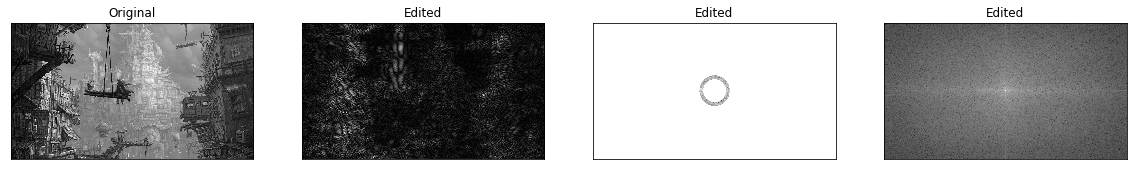

In [58]:
img = cv2.imread('kid.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

##creemos una mascara con un centro cuadrado de 1 y el resto zeros
mask = np.zeros((fils,cols,2), np.uint8)
r_out = 120
r_in = 90
r = 200
center = [centfils, centcols]
x, y = np.ogrid[:fils, :cols]

mask = np.zeros((fils,cols,2), np.uint8)
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
  
            
  
  
mask[mask_area] = 1

##Aplicamos la mascara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,magnitude_spectrum)

**Pasa banda**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


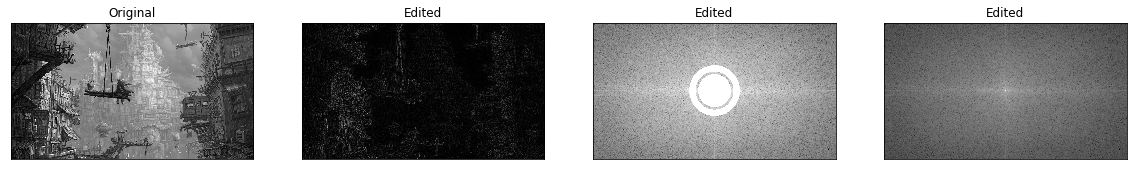

In [210]:
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

##creemos una mascara con un centro cuadrado de 1 y el resto zeros
mask = np.ones((fils,cols,2), np.uint8)
mask2 = np.ones((fils,cols,2), np.uint8)
r_out = 200
r_in =150
r = 130
r2 = 0
center = [centfils, centcols]
x, y = np.ogrid[:fils, :cols]

mask = np.ones((fils,cols,2), np.uint8)
mask2 = np.ones((fils,cols,2), np.uint8)
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in **2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
                           
mask_area2 = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r2 **2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r **2))   

  
mask[mask_area] = 0
mask2[mask_area2] = 0

##Aplicamos la mascara y luego obtenemos la inversa DFT
fshift = dft_shift*mask*mask2
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,magnitude_spectrum)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to

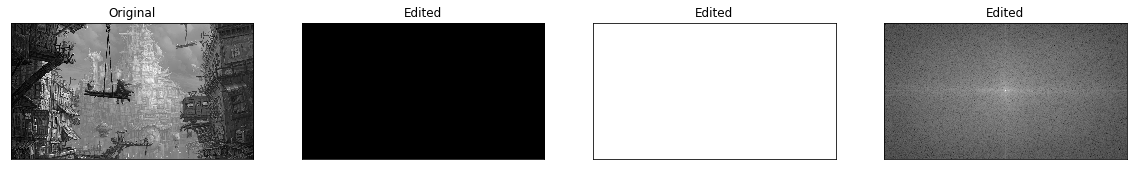

In [205]:
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

##creemos una mascara con un centro cuadrado de 1 y el resto zeros
mask = np.zeros((fils,cols,2), np.uint8)
mask2 = np.ones((fils,cols,2), np.uint8)
r = 110
r2 = 80
center = [centfils, centcols]
x, y = np.ogrid[:fils, :cols]

mask = np.zeros((fils,cols,2), np.uint8)
mask2 = np.ones((fils,cols,2), np.uint8)
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask_area2 = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r2*r2
mask[mask_area] = 1
mask2[mask_area2] = 0

##Aplicamos la mascara y luego obtenemos la inversa DFT
fshift = dft_shift*mask*mask2
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,magnitude_spectrum)